In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
telco_data = pd.read_csv("Telco_Customer_Churn.csv")

In [5]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco_data.dropna(inplace=True)

In [7]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


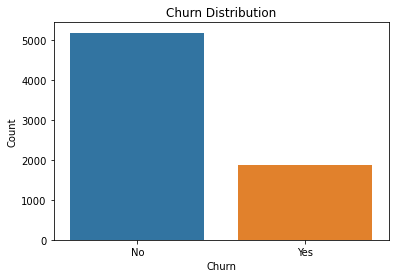

In [9]:
# Check the distribution of the target variable
sns.countplot(x='Churn', data=telco_data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

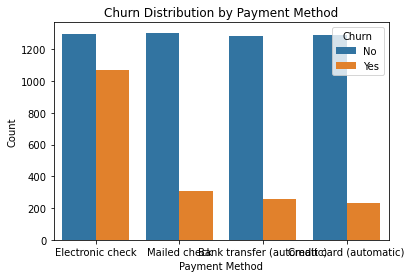

In [11]:
sns.countplot(x='PaymentMethod', hue='Churn', data=telco_data)
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

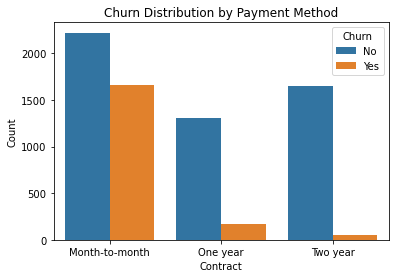

In [12]:
sns.countplot(x='Contract', hue='Churn', data=telco_data)
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()


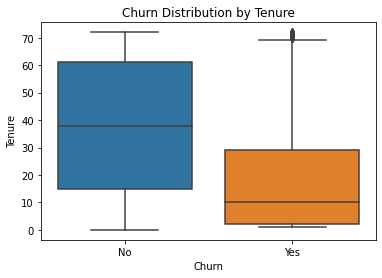

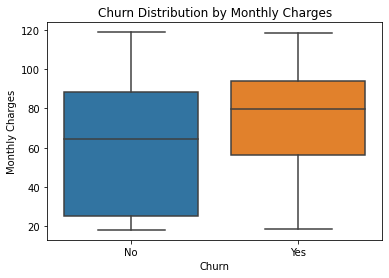

In [13]:
#We can also use box plots to visualize the relationship between the target variable and continuous features such as tenure and MonthlyCharges
sns.boxplot(x='Churn', y='tenure', data=telco_data)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_data)
plt.title('Churn Distribution by Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

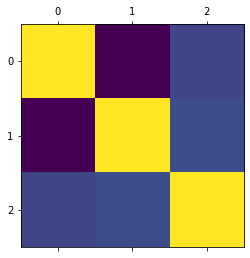

In [15]:
plt.matshow(telco_data.corr())

In [17]:
X=telco_data.iloc[:,1:-1]
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [18]:
y=telco_data["Churn"]
y=pd.DataFrame(y)
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [19]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
# X=LabelEncoder().fit_transform(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
X['gender']=LabelEncoder().fit_transform(X['gender'])
X['Partner']=LabelEncoder().fit_transform(X['Partner'])
X['Dependents']=LabelEncoder().fit_transform(X['Dependents'])
X['PhoneService']=LabelEncoder().fit_transform(X['PhoneService'])
X['MultipleLines']=LabelEncoder().fit_transform(X['MultipleLines'])
X['InternetService']=LabelEncoder().fit_transform(X['InternetService'])
X['OnlineSecurity']=LabelEncoder().fit_transform(X['OnlineSecurity'])
X['OnlineBackup']=LabelEncoder().fit_transform(X['OnlineBackup'])
X['DeviceProtection']=LabelEncoder().fit_transform(X['DeviceProtection'])
X['StreamingTV']=LabelEncoder().fit_transform(X['StreamingTV'])
X['StreamingMovies']=LabelEncoder().fit_transform(X['StreamingMovies'])
X['Contract']=LabelEncoder().fit_transform(X['Contract'])
X['PaperlessBilling']=LabelEncoder().fit_transform(X['PaperlessBilling'])
X['PaymentMethod']=LabelEncoder().fit_transform(X['PaymentMethod'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])


In [22]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [33]:
X['MonthlyCharges'] = X['MonthlyCharges'].astype('int')

In [34]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
median = X['TotalCharges'].median()
X['TotalCharges'].fillna(median,inplace=True)

In [35]:
from sklearn.preprocessing import MinMaxScaler
names=X.columns
indexes=X.index
X=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X,columns=names,index=indexes)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.0,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.015330


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_rem, X_val, y_train_rem, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=42)
X_test_rem, X_test, y_test_rem, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
log = LogisticRegression()

In [41]:
log.fit(X_train,y_train)
acc = accuracy_score(log.predict(X_val),y_val)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 79.91%'

In [42]:
acc

0.7990770323038694

In [43]:
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 79.91%'

In [44]:
acc = accuracy_score(log.predict(X_test),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 80.71%'